# **Titanic Data Analysis**

## **Logistic Regression**

### **Collecting Data**

In [ ]:
#Importing all the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
#Reading the csv file and storing in a variable
titanic_data = pd.read_csv('titanic.csv')

In [ ]:
#Printing the first 10 rows
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#Calculating the rows and columns
titanic_data.shape

(891, 12)

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Analyzing Data**

How many people survived and how many died?

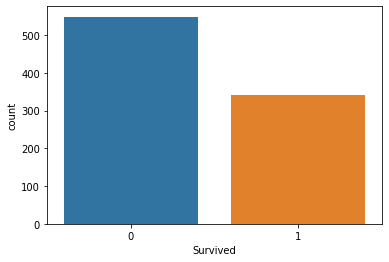

In [ ]:
sns.countplot(x=titanic_data['Survived'])

*We find that appoximately 550 people died and 350 people survived.*

---


Now, let us check how many males and how many females survived and how many didn't?

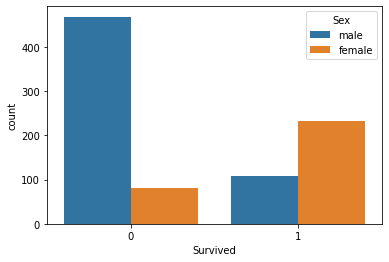

In [ ]:
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Sex'])

*We observe that more male died as compared to women. Survival rate for women was much larger than that of male.*

---
Now, let us check that how many passengers of different passenger classes survived?


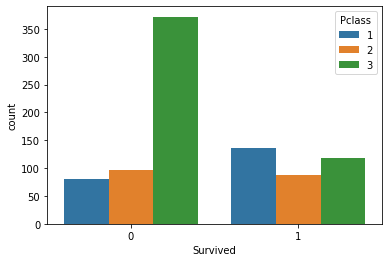

In [ ]:
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Pclass'])

*We observe that third class passengers mostly died in comparison to other class passengers.*

---
Now, let us check the amount of fare as per the passenger class.


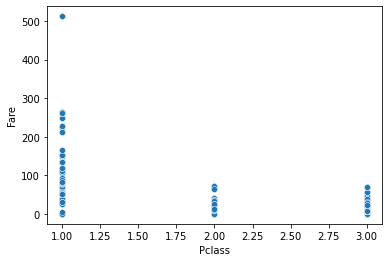

In [ ]:
sns.scatterplot(x=titanic_data['Pclass'], y=titanic_data['Fare'])

*We observe that fare for first class passengers is the highest, and third class passengers is least. So, we can infer that first class passengers must have got priority for evacuating the ship.*

---
Now, let us also check the survival rate of the passengers as per their age


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


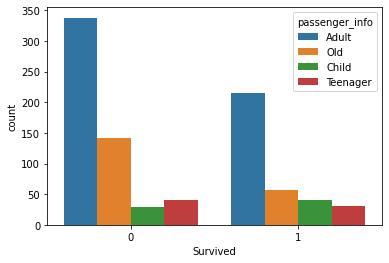

In [ ]:
i=0
titanic_data['passenger_info']=''
for val in titanic_data['Age'].values:
  if(val>=0 and val<=12):
    titanic_data['passenger_info'].iloc[i,:] = 'Child'
  elif(val>=13 and val<=18):
    titanic_data['passenger_info'].iloc[i,:] = 'Teenager'
  elif(val>18 and val<=60):
    titanic_data['passenger_info'].iloc[i,:] = 'Adult'
  else:
    titanic_data['passenger_info'].iloc[i,:] = 'Old'
  i=i+1


sns.countplot(x=titanic_data['Survived'], hue=titanic_data['passenger_info'])

*We observe that maximum death occured for adults.*

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_info
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [ ]:
titanic_data = titanic_data.drop(columns='passenger_info')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


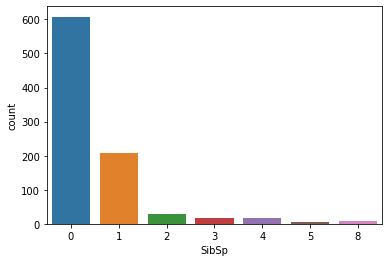

In [ ]:
sns.countplot(x=titanic_data['SibSp'])

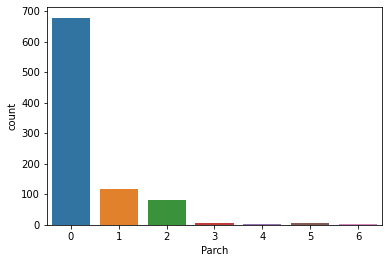

In [ ]:
sns.countplot(x=titanic_data['Parch'])

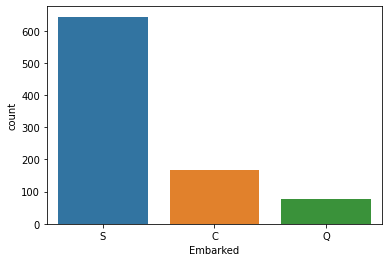

In [ ]:
sns.countplot(x=titanic_data['Embarked'])

### **Data Wrangling**

---

*Data Wrangling means cleaning the data by removing the NaN values and unnecessary columns in the dataset*

In [ ]:
#Check if an NaN value exists in the dataset
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*We observe that null vaue exists in Age, Cabin and Embarked Column*

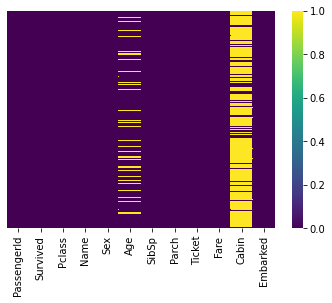

In [ ]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap="viridis")

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#We have many null values in cabin, and the column is not important. So we, will drop this column.
titanic_data.drop(columns='Cabin',axis=1,inplace=True)

In [ ]:
#Drpping the NaN values
titanic_data.dropna(inplace=True)

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now, our data set does not contain any null values.

In [ ]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We observe that there are many string values, but in order to use logistic regression we need to convert it into categorical variables.

In [ ]:
#Creating dummy variables
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embarked = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
pClass = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
pClass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [ ]:
#Adding new columns into the existing dataset
titanic_data=pd.concat([titanic_data,sex,embarked,pClass],axis=1)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [ ]:
titanic_data.drop(['Name','Sex','PassengerId','Embarked','Ticket','Pclass'],axis=1,inplace=True)

In [ ]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### **Train Model**

In [ ]:
#Deciding the independent and dependent variables
X = titanic_data.iloc[:,1:]
Y = titanic_data.iloc[:,0]

In [ ]:
print(X)

      Age  SibSp  Parch     Fare  male  Q  S  2  3
0    22.0      1      0   7.2500     1  0  1  0  1
1    38.0      1      0  71.2833     0  0  0  0  0
2    26.0      0      0   7.9250     0  0  1  0  1
3    35.0      1      0  53.1000     0  0  1  0  0
4    35.0      0      0   8.0500     1  0  1  0  1
..    ...    ...    ...      ...   ... .. .. .. ..
885  39.0      0      5  29.1250     0  1  0  0  1
886  27.0      0      0  13.0000     1  0  1  1  0
887  19.0      0      0  30.0000     0  0  1  0  0
889  26.0      0      0  30.0000     1  0  0  0  0
890  32.0      0      0   7.7500     1  1  0  0  1

[712 rows x 9 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64


In [ ]:
#Splitting the data into training and testing set
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

In [ ]:
#Creating the model
from sklearn.linear_model import LogisticRegression

In [ ]:
#Creating instance of logistic regression
logisticModel = LogisticRegression(solver='lbfgs', max_iter=1000)

In [ ]:
#Training the model
logisticModel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **Testing the model**

In [ ]:
predictions = logisticModel.predict(X_test)

### **Checking the Accuracy of the model**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test,predictions)

array([[102,  24],
       [ 25,  63]])

In [ ]:
accuracy = (102+63)/(102+24+25+63)*100
print(accuracy)

77.10280373831776


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,predictions)*100

77.10280373831776

## **Decision Tree Algorithm**

In [ ]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


Choosing only the categorical data for prediction

In [ ]:
X = titanic_data.iloc[:, np.r_[2:4,5:10]]
Y = titanic_data.iloc[:,0]

In [ ]:
print(X)

     SibSp  Parch  male  Q  S  2  3
0        1      0     1  0  1  0  1
1        1      0     0  0  0  0  0
2        0      0     0  0  1  0  1
3        1      0     0  0  1  0  0
4        0      0     1  0  1  0  1
..     ...    ...   ... .. .. .. ..
885      0      5     0  1  0  0  1
886      0      0     1  0  1  1  0
887      0      0     0  0  1  0  0
889      0      0     1  0  0  0  0
890      0      0     1  1  0  0  1

[712 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Creating instance of Decision Tree
treeModel = DecisionTreeClassifier(random_state=1)

In [ ]:
#Traning the model
treeModel.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
#Testing the model
predictions = treeModel.predict(X_test)

In [ ]:
#Checking the accuracy of the model
confusion_matrix(Y_test,predictions)

array([[113,  13],
       [ 32,  56]])

In [ ]:
# accuracy = (100+57)/(100+26+31+57)
accuracy = (113+56)/(113+13+32+56)*100
print(accuracy)


78.97196261682244


In [ ]:
accuracy_score(Y_test,predictions)*100

78.97196261682244

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forestModel = RandomForestClassifier(n_estimators=200,random_state=1)

In [ ]:
forestModel.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
predictions = forestModel.predict(X_test)

In [ ]:
accuracy_score(Y_test,predictions)*100

78.50467289719626